In [10]:
import sys
sys.path.append('../base_lib')

import pandas as pd
 
import functions as func
import imputation as imp

In [2]:
dataset = pd.read_csv("../data/datiLussazioniDefinitivi.csv", delimiter=';')
dataset = func.clean_dataset(dataset)
dataset

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,...,4,1,46.0,15,17.7,0,-1.0,-1.0,0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,...,5,1,40.0,25,27.7,0,-1.0,-1.0,0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,...,4,1,42.0,20,27.7,1,-1.0,-1.0,0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,...,4,0,40.0,18,24.2,0,-1.0,-1.0,0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,...,5,1,42.0,28,25.9,1,-1.0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,...,3,0,43.0,32,27.7,0,35.0,0.0,1,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,...,4,0,48.0,26,25.9,0,18.0,0.0,1,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,...,4,0,48.0,4,11.5,0,30.0,0.0,1,1
3195,5,1,11.533333,28.0,1,5.0,2001,1.0,2,0,...,4,0,52.0,10,31.3,0,26.0,0.0,1,1


In [3]:
dataset[dataset.isnull().any(axis=1)]

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
505,10,1,31.400000,26.4,1,5.0,2019,-1.0,6,3,...,4,0,45.0,18,NaN,0,-1.0,-1.0,0,0
1397,10,0,7.600000,28.0,1,NaN,2011,-1.0,4,0,...,4,0,42.0,20,31.3,0,-1.0,-1.0,0,0
2327,3,0,14.866667,70.0,1,5.0,2018,-1.0,6,7,...,10,4,NaN,28,25.9,0,-1.0,-1.0,0,0
3176,7,0,14.100000,56.0,1,NaN,2011,1.0,4,1,...,4,1,40.0,15,39.5,0,1626.0,0.0,1,1


In [4]:
dataset.isna().sum()

BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         2
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         1
CUPRETROVERSION             0
STEMANTEVERSIONREAL         1
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

In [6]:
dataset_imputed = imp.total_imputation_mean_median(dataset)

dataset_imputed.isna().sum()

BREED                       0
GENDER_01                   0
AGEATSURGERYmo              0
BODYWEIGHTKG                0
Taglia                      0
BCS                         0
YEAR                        0
n_luxation                  0
GENERATION                  0
STEMSIZE                    0
CUPSIZE                     0
NECKSIZE                    0
HEADSIZE                    0
ALO                         0
CUPRETROVERSION             0
STEMANTEVERSIONREAL         0
RECTUSFEMORISM.RELEASE      0
first_lux_days_after_thr    0
DIRECTION                   0
LUX_01                      0
LUX_CR                      0
dtype: int64

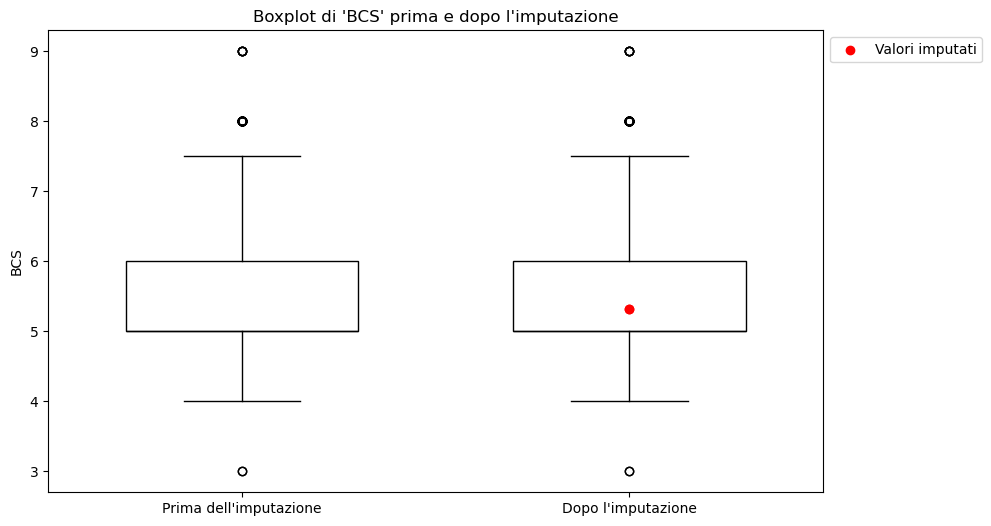

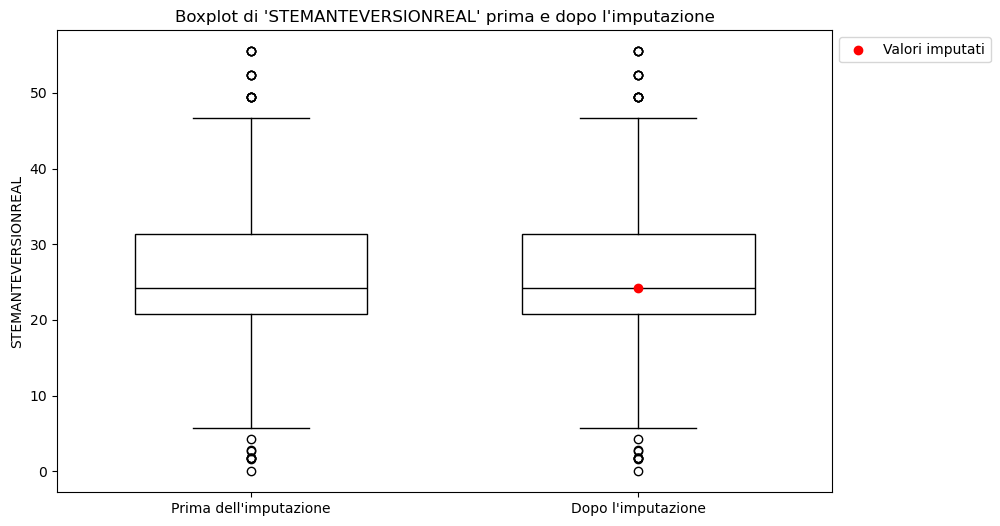

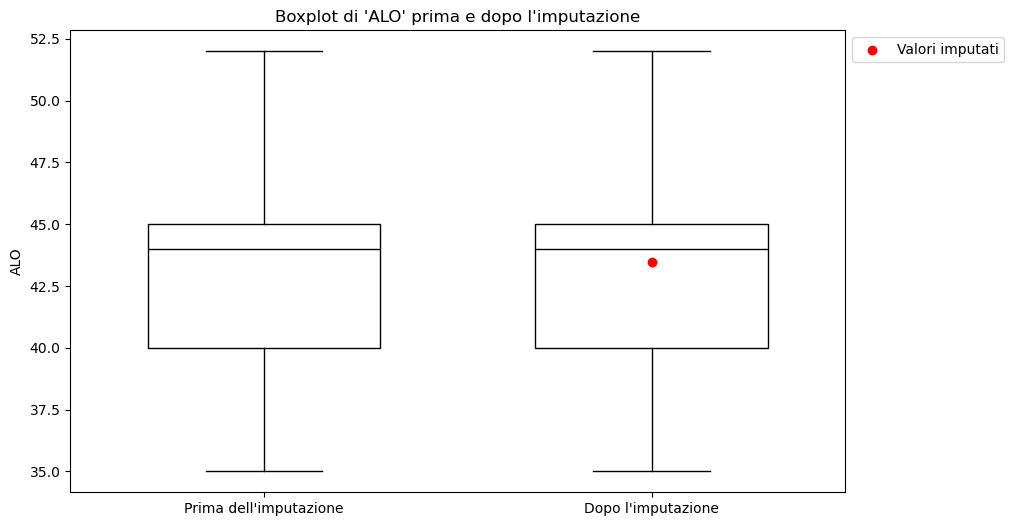

In [8]:
cols = ['BCS', 'STEMANTEVERSIONREAL', 'ALO']

for col in cols:
    func.plot_boxplot(dataset, dataset_imputed, col)